# Primera parte

## **Pasos a seguir**
1. Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.
2. Filtra el DataFrame para incluir solo las filas correspondientes a los ganadores de medallas de 2016.
3. Descubre las medallas concedidas en 2016 en cada deporte.
4. Enumera los cinco deportes más importantes en función del mayor número de medallas concedidas. Filtra el DataFrame una vez más para incluir solo los registros de los cinco deportes principales en 2016.
5. Genere un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales.
6. Generar un histograma para la característica Edad de todos los ganadores de medallas en los cinco deportes principales (2016).
7. Genera un gráfico de barras que indique cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016.
8. Genere un gráfico de barras que indique el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.

## **Desarrollo**

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'athlete_events.csv'

Tal como se indicó en las instrucciones, se filtró el dataframe para tomar aquellos deportistas que participaron en el año 2016 y que ganaron una medalla.

In [3]:
df2016m =  df.query('Year == 2016')
df2016m =  df2016m[df2016m['Medal'].notna()]
df2016m.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Para obtener un recuento de las medallas por deporte en el 2016 se hizo uso de value_counts()

In [4]:
df2016m['Sport'].value_counts()

Sport
Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Volleyball                72
Basketball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Shooting                  45
Weightlifting             45
Sailing                   45
Equestrianism             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Archery                   24
Badminton                 24
Table Tennis              24
Tennis                    24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: co

Donde los 5 deportes con más medallas fueron *atletismo*, *natación*, *remo*, *fútbol* y *hockey*. Ahora filtremos el dataframe en función de los deportes con más medallas.

In [5]:
sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
df2016m = df2016m[df2016m['Sport'].isin(sports)]
df2016m.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


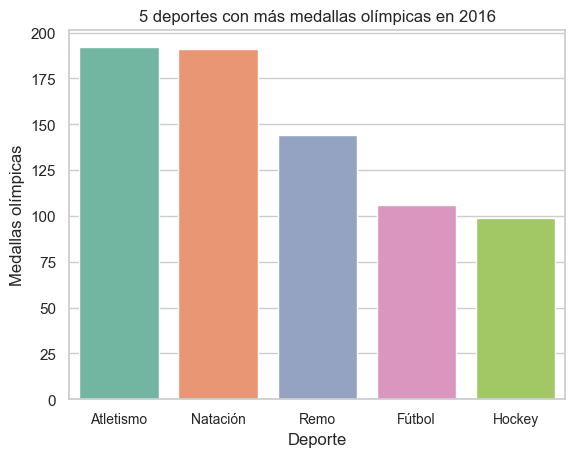

In [6]:
sns.set_theme(style="whitegrid")

ax = sns.countplot(x="Sport", data=df2016m, palette="Set2", order=sports)
ax.set(xlabel="Deporte", ylabel="Medallas olímpicas", 
       title="5 deportes con más medallas olímpicas en 2016")
ax.set_xticklabels(["Atletismo", "Natación", "Remo", "Fútbol", "Hockey"], fontsize=10)

plt.show()

[Text(0.5, 1.0, 'Distribución de la edad de medallistas olímpicos en 2016'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Frecuencia')]

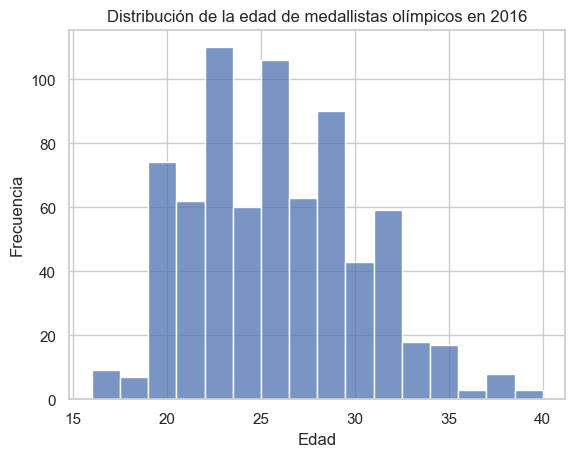

In [7]:
ax = sns.histplot(df2016m['Age'], palette = "Set2")
ax.set(title = 'Distribución de la edad de medallistas olímpicos en 2016', xlabel = "Edad", ylabel = 'Frecuencia')

Ahora revisemos cómo están distruidas el número de medallas por países.

In [8]:
df2016m['Team'].value_counts()

Team
United States          127
Germany                 88
Great Britain           69
Canada                  45
Australia               43
Netherlands             34
Jamaica                 30
Sweden                  21
France                  20
Brazil                  19
Belgium                 18
Nigeria                 18
Argentina               18
Japan                   15
China                   15
Kenya                   13
Denmark                 12
Italy                   10
New Zealand              9
Romania                  9
Poland                   9
South Africa             9
Hungary                  8
Ethiopia                 8
Croatia                  6
Bahamas                  6
Spain                    4
Estonia                  4
Lithuania                4
Norway                   4
Switzerland              4
Russia                   4
Kazakhstan               2
Ireland                  2
Algeria                  2
Bahrain                  2
Greece                 

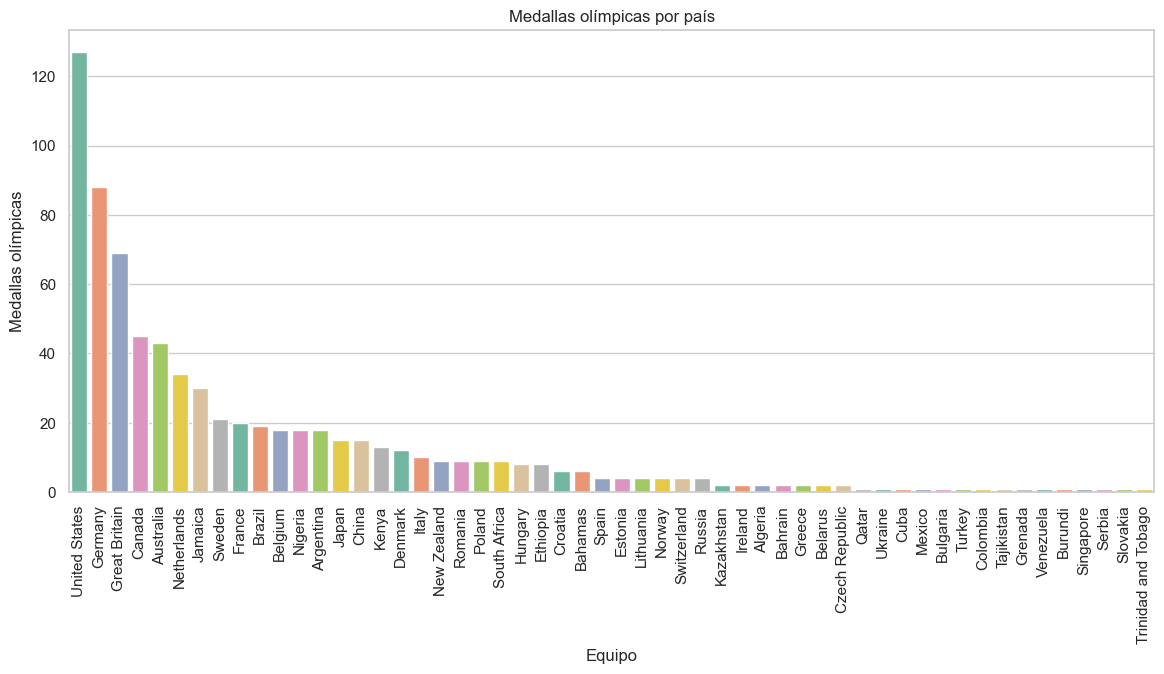

In [9]:
orden = df2016m['Team'].value_counts().index

plt.figure(figsize=(14, 6))
ax = sns.countplot(x="Team", data=df2016m, palette="Set2", order=orden)
ax.set(xlabel="Equipo", ylabel="Medallas olímpicas", 
       title="Medallas olímpicas por país")
plt.xticks(rotation=90)
plt.show()

```{note}
Here is a note
```

```{seealso}
Jupyter Book uses [Jupytext](https://jupytext.readthedocs.io/en/latest/) to convert text-based files to notebooks, and can support [many other text-based notebook files](https://jupyterbook.org/file-types/jupytext.html).
```